In [1]:
import numpy as np
import random
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
from alpaca_trade_api.rest import REST, TimeFrame
import hvplot.pandas
from scipy.interpolate import interp1d
import datetime as dt

import warnings
warnings.filterwarnings('ignore')



import portfolio_management_tools as pmt

In [2]:
load_dotenv()

True

### List of functions

fetch_stock_data(start_date, end_date, stock_list) <br>
weights(stock_list, repeats) <br>
annual_portfolio_return(df, weight_list) <br>
annual_portfolio_risk(df, weight_list) <br>
mc_sim(df, weight_list, timeframe, nsims, investment_amount = 1, kind = 'line') <br>
mc_sim_comparison(df, df2, weight_1, weight_2, timeframe, nsims, investment_amount = 1) <br>
actual_return_plot(df, weight_list, timeframe, investment_amount = 1) <br>
yearly_portfolio_info(df, weight_list) <br>
opportunity_set(df, my_weights, repeats, risk_free_return = 0, cal = False) <br>

In [3]:
stock_list = ['AAPL', 'KO', 'IBM']
df = pmt.fetch_stock_data('2016-01-01', '2019-12-31', stock_list)

In [4]:
df

,AAPL,KO,IBM
timestamp,,,
2016-01-04,105.35,42.40,135.95
2016-01-05,102.71,42.55,135.85
2016-01-06,100.70,42.32,135.17
2016-01-07,96.45,41.62,132.86
2016-01-08,96.96,41.51,131.63
...,...,...,...
2019-12-24,284.27,54.71,134.98
2019-12-26,289.91,55.02,134.91
2019-12-27,289.80,55.35,135.27


In [5]:
my_weight = pmt.weights(stock_list, 1)

In [6]:
display(pmt.annual_portfolio_return(df,my_weight))
display(pmt.annual_portfolio_risk(df, my_weight))

0.07420801802207175

0.13006421887770295

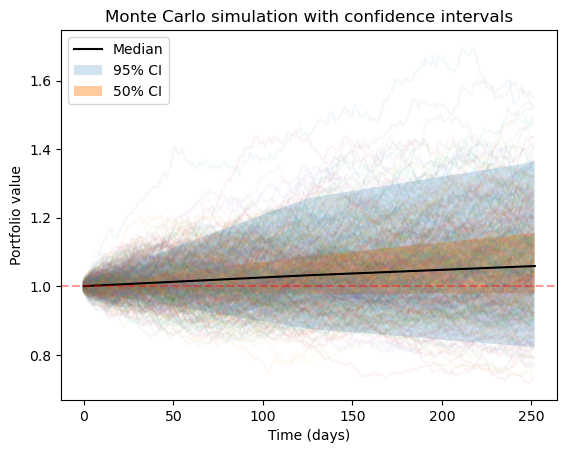

In [7]:
a = pmt.mc_sim(df, my_weight, 252, 500, kind = 'visualize_ci')

Your portfolio consists of: 
8.99% of AAPL
54.49% of KO
36.52% of IBM
------------------------------
Optimal risky portfolio consists of: 
66.27% of AAPL
32.53% of KO
1.20% of IBM
------------------------------
Safest portfolio consists of: 
16.55% of AAPL
63.45% of KO
20.00% of IBM
------------------------------


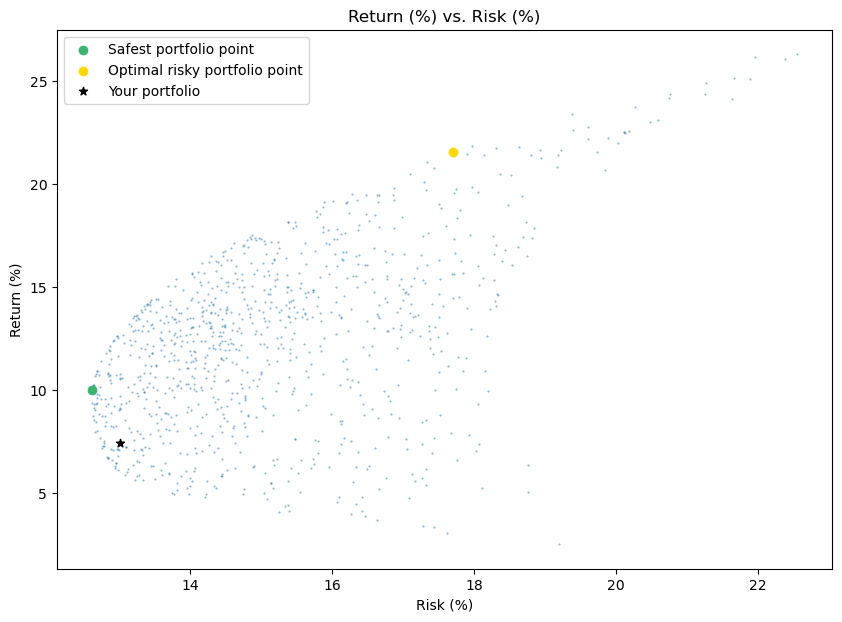

In [8]:
opt_weight = pmt.opportunity_set(df, my_weight, 1000)

In [9]:
pmt.yearly_portfolio_info(df, my_weight)

:Bars   [index,Variable]   (value)

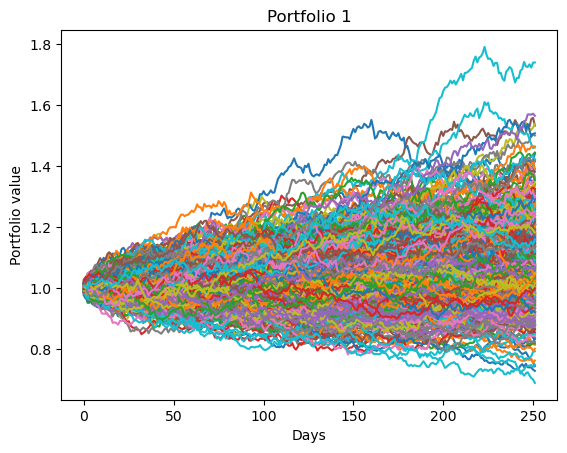

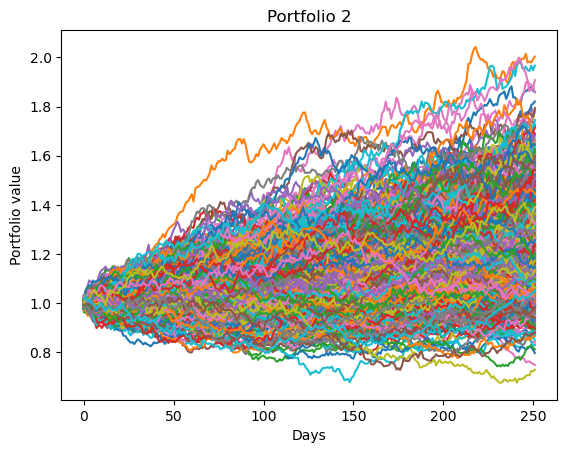

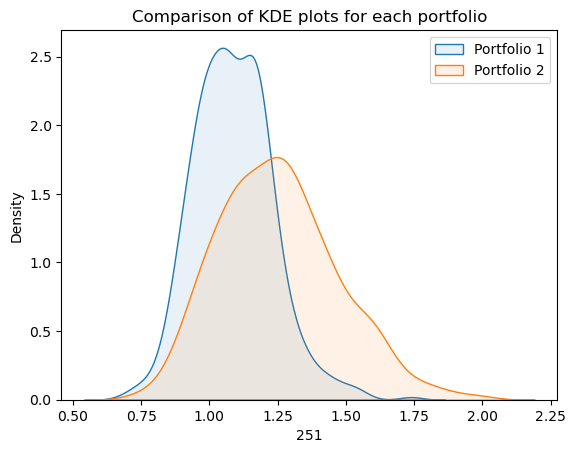

In [10]:
pmt.mc_sim_comparison(df, df, my_weight, opt_weight, 252, 500)

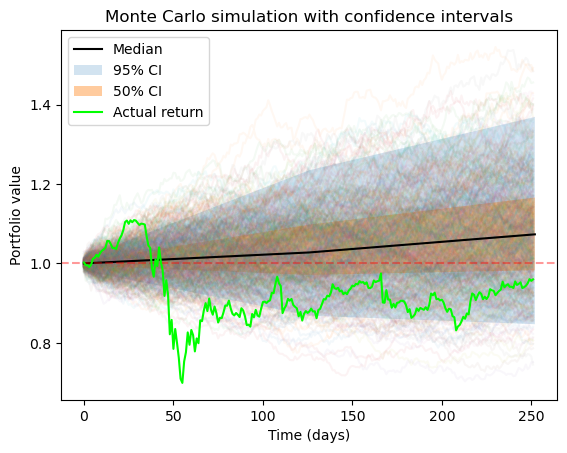

In [11]:
pmt.mc_sim(df, my_weight, 252, 500, kind = 'visualize_ci')
pmt.actual_return_plot(df, my_weight, 365)